In [1]:
import numpy as np
import os
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D, MaxPooling2D, Dropout, Activation
from keras.utils import to_categorical

**Load Images**

In [3]:
img_dir = "C:/Users/Kacper/Desktop/github/OneFish-Disseration-Project/Model/img"
file_extensions =['jpg' , 'jpeg' , 'png' , 'jfif'] #makes a list of allowed file formats

Preprocessing data

In [4]:
def dataClean():
    file_count = 0
    for folder in os.listdir(img_dir):
        folder_path = os.path.join(img_dir,folder)
        for filename in os.listdir(folder_path):
            file_path = os.path.join(folder_path,filename)
            if filename.rsplit('.', 1)[1] in file_extensions:
                continue
            else:
                print("Removed:" + file_path)
                os.remove(file_path)
                file_count += 1
    return print("clean up complete, removed: {count} files".format(count = file_count))

## goes into each folder and cleans up data
dataClean()

clean up complete, removed: 0 files


In [5]:

batch_size = 32
img_h, img_w = 255,255

train_ds = tf.keras.utils.image_dataset_from_directory(
    img_dir,
    validation_split=0.2,
    subset="training",
    seed =123,
    image_size=(img_h,img_w),
    batch_size= batch_size)

# a function from the keras library that creates a dataset from the images in folder, which will transform the images to a 255 x 255.
# This dataset will be used to train the model

Found 7482 files belonging to 30 classes.
Using 5986 files for training.


In [6]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  img_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_h, img_w),
  batch_size=batch_size)

#creates a test/validation dataset

Found 7482 files belonging to 30 classes.
Using 1496 files for validation.


In [7]:
class_names = train_ds.class_names
print(class_names)

['Abramis brama (Common bream)', 'Acipenseridae (Sturgeon)', 'Anguilla anguilla (European eel)', 'Aspius aspius (Asp)', 'Barbus barbus (Common barbel)', 'Blicca bjoerkna (silver bream)', 'Carassius carassius (Crucian carp)', 'Carassius gibelio (Prussian carp)', 'Ctenopharyngodon idella (Grass carp)', 'Cyprinus carpio (Common carp)', 'Esox lucius (Northern pike)', 'Gasterosteus aculeatus (Three-spined stickleback)', 'Gobio gobio (gudgeon)', 'Gymnocephalus cernuus (Eurasian ruffe)', 'Lepomis gibbosus (The pumpkinseed)', 'Leuciscus cephalus (common chub)', 'Leuciscus idus (Ide)', 'Leuciscus leuciscus (Common dace)', 'Neogobius fluviatilis (Monkey goby)', "Neogobius kessleri (Kessler's goby)", 'Neogobius melanostomus (Round goby)', 'Perca fluviatilis (European perch)', 'Rhodeus amarus (European bitterling)', 'Rutilus rutilus (Common roach)', 'Salmo trutta subsp. fario (Brown Trout)', 'Sander lucioperca (Zander)', 'Scardinius erythrophthalmus (Rudd)', 'Silurus glanis (Wels catfish)', 'Tinca

In [8]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
## general settings that will help the performance of the computer and prevent the model filling up the entire RAM of the computer

In [9]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.3),
    layers.RandomZoom(0.3),
  ]
)
#some basic data argumentation that will be used to add more variance to the dataset

In [10]:
num_classes = len(class_names)
# model adapted from https://www.tensorflow.org/tutorials/images/classification [accessed 05/01/2023]
model = tf.keras.Sequential([
  data_augmentation,
  tf.keras.layers.Rescaling(1./255, input_shape=(img_h, img_w, 3)),
  tf.keras.layers.Conv2D(16, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Conv2D(16, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(num_classes, activation='softmax')
])

In [73]:
model = Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(img_h, img_w, 3)),
    Conv2D(16, (3, 3), activation='relu',), 
    MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(256, (3, 3), activation='relu'),
    Conv2D(256, (3, 3), activation='relu'),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(512, activation='relu'),
    Dense(num_classes, activation='softmax')
])

In [11]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']) 

In [13]:
epochs = 20
history = model.fit(train_ds, validation_data=val_ds, epochs = epochs)

Epoch 1/20
188/188 [==============================] - 46s 244ms/step - loss: 2.6362 - accuracy: 0.2208 - val_loss: 2.6918 - val_accuracy: 0.2213
Epoch 2/20
188/188 [==============================] - 45s 237ms/step - loss: 2.5347 - accuracy: 0.2469 - val_loss: 2.5002 - val_accuracy: 0.2834
Epoch 3/20
188/188 [==============================] - 45s 240ms/step - loss: 2.4385 - accuracy: 0.2676 - val_loss: 2.6387 - val_accuracy: 0.2500
Epoch 4/20
188/188 [==============================] - 46s 246ms/step - loss: 2.3843 - accuracy: 0.2813 - val_loss: 2.5177 - val_accuracy: 0.2620
Epoch 5/20
188/188 [==============================] - 46s 246ms/step - loss: 2.3094 - accuracy: 0.3022 - val_loss: 2.4449 - val_accuracy: 0.3068
Epoch 6/20
188/188 [==============================] - 46s 246ms/step - loss: 2.2544 - accuracy: 0.3154 - val_loss: 2.3365 - val_accuracy: 0.3155
Epoch 7/20
188/188 [==============================] - 46s 244ms/step - loss: 2.2046 - accuracy: 0.3304 - val_loss: 2.3346 - val_ac

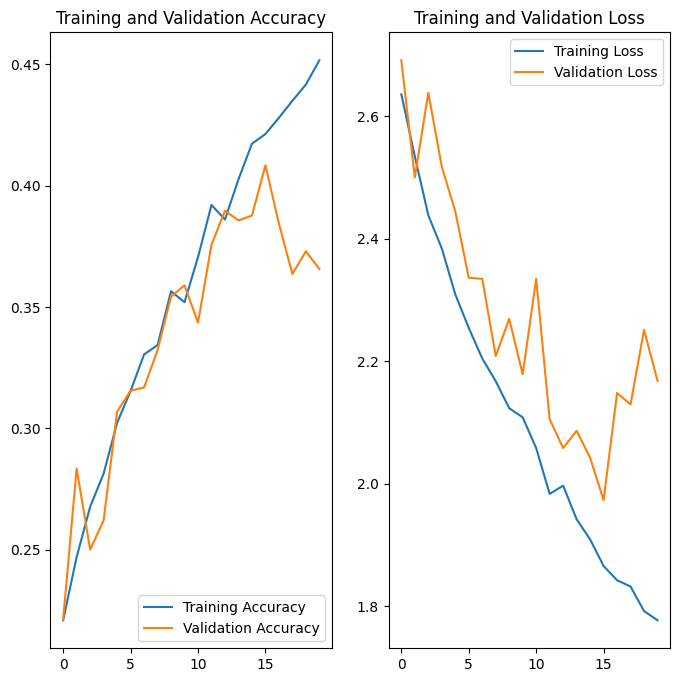

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## graph plot adapted from # model adapted from https://www.tensorflow.org/tutorials/images/classification [accessed 05/01/2023]

In [ ]:
model.save("CNN_Model_v1.0.hdf5")#saves the model as a hdf5 file

Confusion matrix

In [18]:
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

1/1 [==============================] - 0s 20ms/step


<Axes: >

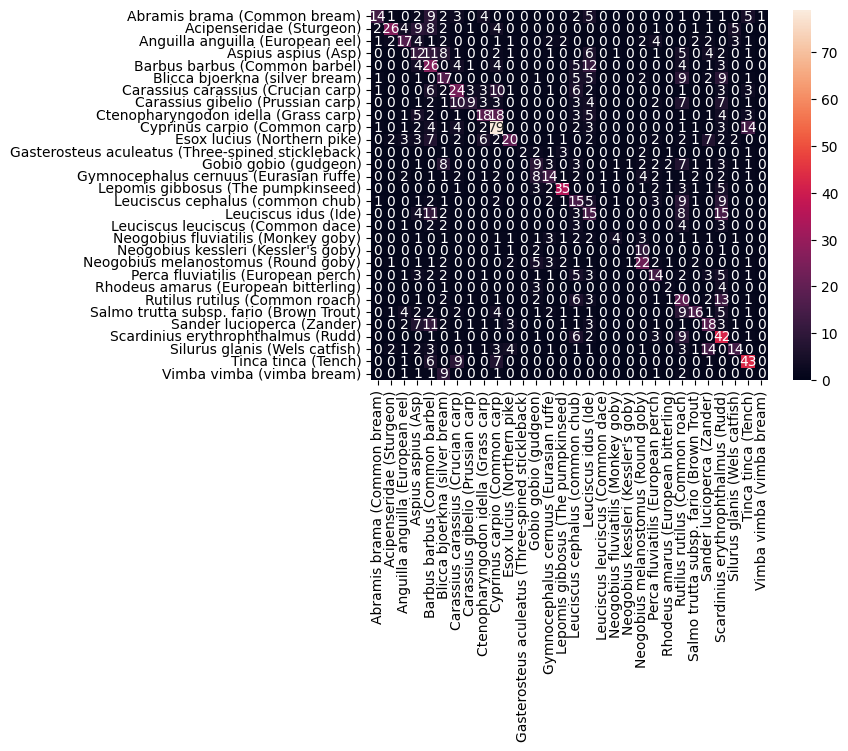

In [24]:
val_labels = []
val_pred_probs = []
for images, labels in val_ds:
    val_labels.extend(labels.numpy())
    pred_probs = model.predict(images)
    val_pred_probs.extend(pred_probs)
val_pred_labels = np.argmax(val_pred_probs, axis=1)
#produces the labes from the validation datset
# Generate confusion matrix
confusionM = confusion_matrix(val_labels, val_pred_labels)
#produces a confusion sklearn confusion matrix that can be used t
# Create heatmap
sns.heatmap(confusionM, annot=True, xticklabels=class_names, yticklabels=class_names)